In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

np.random.seed(13)

### Данные

In [2]:
data = load_digits()

In [3]:
X = data['data']
y = (data['target'] >= 5).astype(np.int32)

<Figure size 640x480 with 0 Axes>

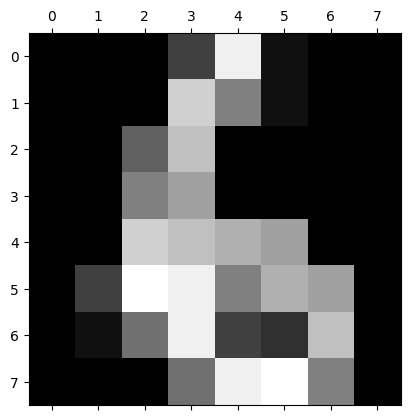

6


In [4]:
plt.gray()
index = np.random.randint(0, len(X) - 1)
plt.matshow(X[index].reshape(8, 8))
plt.show()
print(data.target[index])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.77,
                                                    shuffle=True)

In [6]:
X_train.shape, X_test.shape

((1383, 64), (414, 64))

### Логистическая регрессия

Вычисление предсказания логистической регрессией для объекта $x_i \in \mathbb{R}^n$ :

* $z = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$
* $a = \sigma (z)$

Сигмоида

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

![alt text](https://upload.wikimedia.org/wikipedia/commons/a/ac/Logistic-curve.png)

Логистическая фунция потерь:

$$L_i(a) = -y_i \cdot log(a) - (1 - y_i) \cdot log(1 - a)$$

Производные функции по параметрам:

$$\frac{\partial L_i}{\partial w} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial w} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot x_i = (a-y_i) \cdot x_i $$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial a} \cdot \frac{\partial a}{\partial z}
\cdot \frac{\partial z}{\partial b} = \frac {a - y_i} {a \cdot (1-a)} \cdot a \cdot (1-a) \cdot 1 = a-y_i $$

Используются для минимизации функции потерь $L$ с помощью градиентного спуска.

In [7]:
def log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred), axis=0) / len(y_true)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [8]:
m, n = X_train.shape
print(f'Число объектов в обучающей выборке: {m}\nРазмерность объекта: {n}')

Число объектов в обучающей выборке: 1383
Размерность объекта: 64


C:\Users\User\AppData\Local\Temp\ipykernel_420\1434606554.py:30: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)
C:\Users\User\AppData\Local\Temp\ipykernel_420\1434606554.py:30: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)


Accuracy: 90.57%


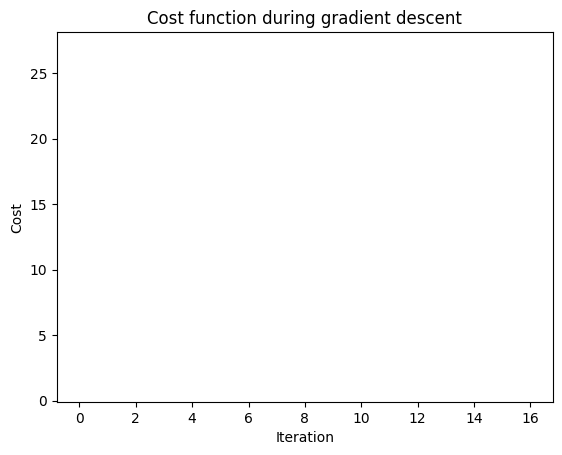

In [9]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Загрузка данных
data = load_digits()

# Преобразуем целевую переменную (бинаризация)
X = data.data
y = (data.target >= 5).astype(np.int32)  # Преобразуем в задачу бинарной классификации

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Добавляем столбец с единицами для учета перехвата (bias)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

# Инициализация весов
weights = np.zeros(X_train.shape[1])

# Сигмоида
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция потерь (логистическая функция потерь)
def log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)

# Производные функции потерь
def gradient(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    gradient_w = np.dot(X.T, predictions - y) / len(y)
    return gradient_w

# Градиентный спуск
def gradient_descent(X, y, weights, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        grad = gradient(X, y, weights)
        weights -= learning_rate * grad
        predictions = sigmoid(np.dot(X, weights))
        cost = log_loss(y, predictions)
        cost_history.append(cost)
    return weights, cost_history

# Настройки градиентного спуска
learning_rate = 0.1
iterations = 1000

# Запуск градиентного спуска
final_weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Прогнозирование
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

# Оценка точности
y_pred = predict(X_test, final_weights)
accuracy = accuracy_score(y_test, y_pred)

# Вывод результатов
print(f"Accuracy: {accuracy * 100:.2f}%")

# График стоимости на каждом шаге
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function during gradient descent')
plt.show()


In [11]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [13]:
# Преобразуем целевую переменную (бинаризация)
X = data.data
y = (data.target >= 5).astype(np.int32)  # Преобразуем в задачу бинарной классификации
y

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [16]:
# Нормализация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test

array([[ 0.        , -0.35276262, -1.07887239, ...,  1.23136343,
         0.70082655, -0.19535349],
       [ 0.        , -0.35276262,  1.19159808, ..., -0.98875332,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262,  0.57237886, ...,  0.20669416,
        -0.505317  , -0.19535349],
       ...,
       [ 0.        , -0.35276262, -1.07887239, ..., -0.81797511,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262,  0.77878527, ...,  0.37747237,
        -0.505317  , -0.19535349],
       [ 0.        , -0.35276262, -0.45965317, ..., -0.30564047,
        -0.505317  , -0.19535349]])

In [17]:
# Добавляем столбец с единицами для учета перехвата (bias)
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [18]:
# Инициализация весов
weights = np.zeros(X_train.shape[1])

In [19]:
# Сигмоида
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция потерь (логистическая функция потерь)
def log_loss(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / len(y_true)

# Производные функции потерь
def gradient(X, y, weights):
    predictions = sigmoid(np.dot(X, weights))
    gradient_w = np.dot(X.T, predictions - y) / len(y)
    return gradient_w

# Градиентный спуск
def gradient_descent(X, y, weights, learning_rate, iterations):
    cost_history = []
    for _ in range(iterations):
        grad = gradient(X, y, weights)
        weights -= learning_rate * grad
        predictions = sigmoid(np.dot(X, weights))
        cost = log_loss(y, predictions)
        cost_history.append(cost)
    return weights, cost_history

In [20]:
# Настройки градиентного спуска
learning_rate = 0.01  # Попробуем уменьшить скорость обучения
iterations = 1000

In [21]:
# Запуск градиентного спуска
final_weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, iterations)

# Прогнозирование
def predict(X, weights):
    return sigmoid(np.dot(X, weights)) >= 0.5

# Оценка точности
y_pred = predict(X_test, final_weights)
accuracy = accuracy_score(y_test, y_pred)

In [22]:
# Вывод результатов
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.89%


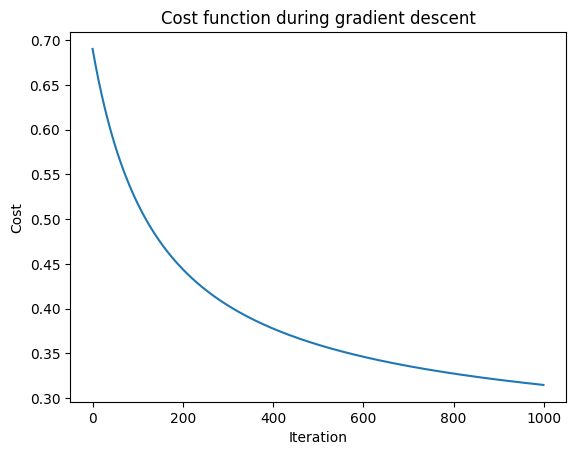

In [23]:
# График стоимости на каждом шаге
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost function during gradient descent')
plt.show()

Точность модели на тестовых данных составила 88.89%. Это довольно хороший результат для задачи классификации